In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patchh
import scipy.io

In [2]:
enrich=scipy.io.loadmat('enrichment_analysis/enrichment_mats_recon3d.mat')
lt2=enrich['enrich_lt2']
lg=enrich['enrich_lg']
sd=enrich['enrich_sd']

df=pd.read_excel('../Pathway_enrichment/path_tiss_pairs.xlsx')
cols = ['Cysteine Metabolism','Selenoamino acid metabolism','Xenobiotics metabolism']

# dropping all the rows with Pathways as in cols
df=df[~df.Pathway.isin(cols)]
pathway_new=df.Pathway
pathway_new[df.Pathway=='Androgen and estrogen synthesis and metabolism']='Androgen and estrogen synthesis metabolism'
pathway_new[df.Pathway=='beta-Alanine metabolism']='Beta-Alanine metabolism'
df.Pathway=pathway_new

paths=np.unique(df.Pathway)
dic={}
for tiss in np.unique(df.Tissue):
  dic[tiss]=df.Pathway[df.Tissue==tiss].values

dic.pop("brain")

array(['Androgen and estrogen synthesis metabolism',
       'Beta-Alanine metabolism', 'Citric acid cycle',
       'Fatty acid oxidation', 'Glutamate metabolism',
       'Glycolysis/gluconeogenesis', 'Glycolysis/gluconeogenesis',
       'Pentose phosphate pathway'], dtype=object)

In [3]:
paths

array(['Aminosugar metabolism',
       'Androgen and estrogen synthesis metabolism',
       'Arachidonic acid metabolism', 'Arginine and Proline Metabolism',
       'Beta-Alanine metabolism', 'Bile acid synthesis',
       'Butanoate metabolism', 'Cholesterol metabolism',
       'Citric acid cycle', 'Fatty acid oxidation', 'Folate metabolism',
       'Glutamate metabolism', 'Glycerophospholipid metabolism',
       'Glycolysis/gluconeogenesis',
       'Glyoxylate and dicarboxylate metabolism', 'Heme synthesis',
       'Pentose phosphate pathway', 'Phenylalanine metabolism',
       'Phosphatidylinositol phosphate metabolism',
       'Sphingolipid metabolism', 'Squalene and cholesterol synthesis',
       'Tetrahydrobiopterin metabolism', 'Triacylglycerol synthesis',
       'Tyrosine metabolism', 'Vitamin B2 metabolism',
       'Vitamin B6 metabolism'], dtype=object)

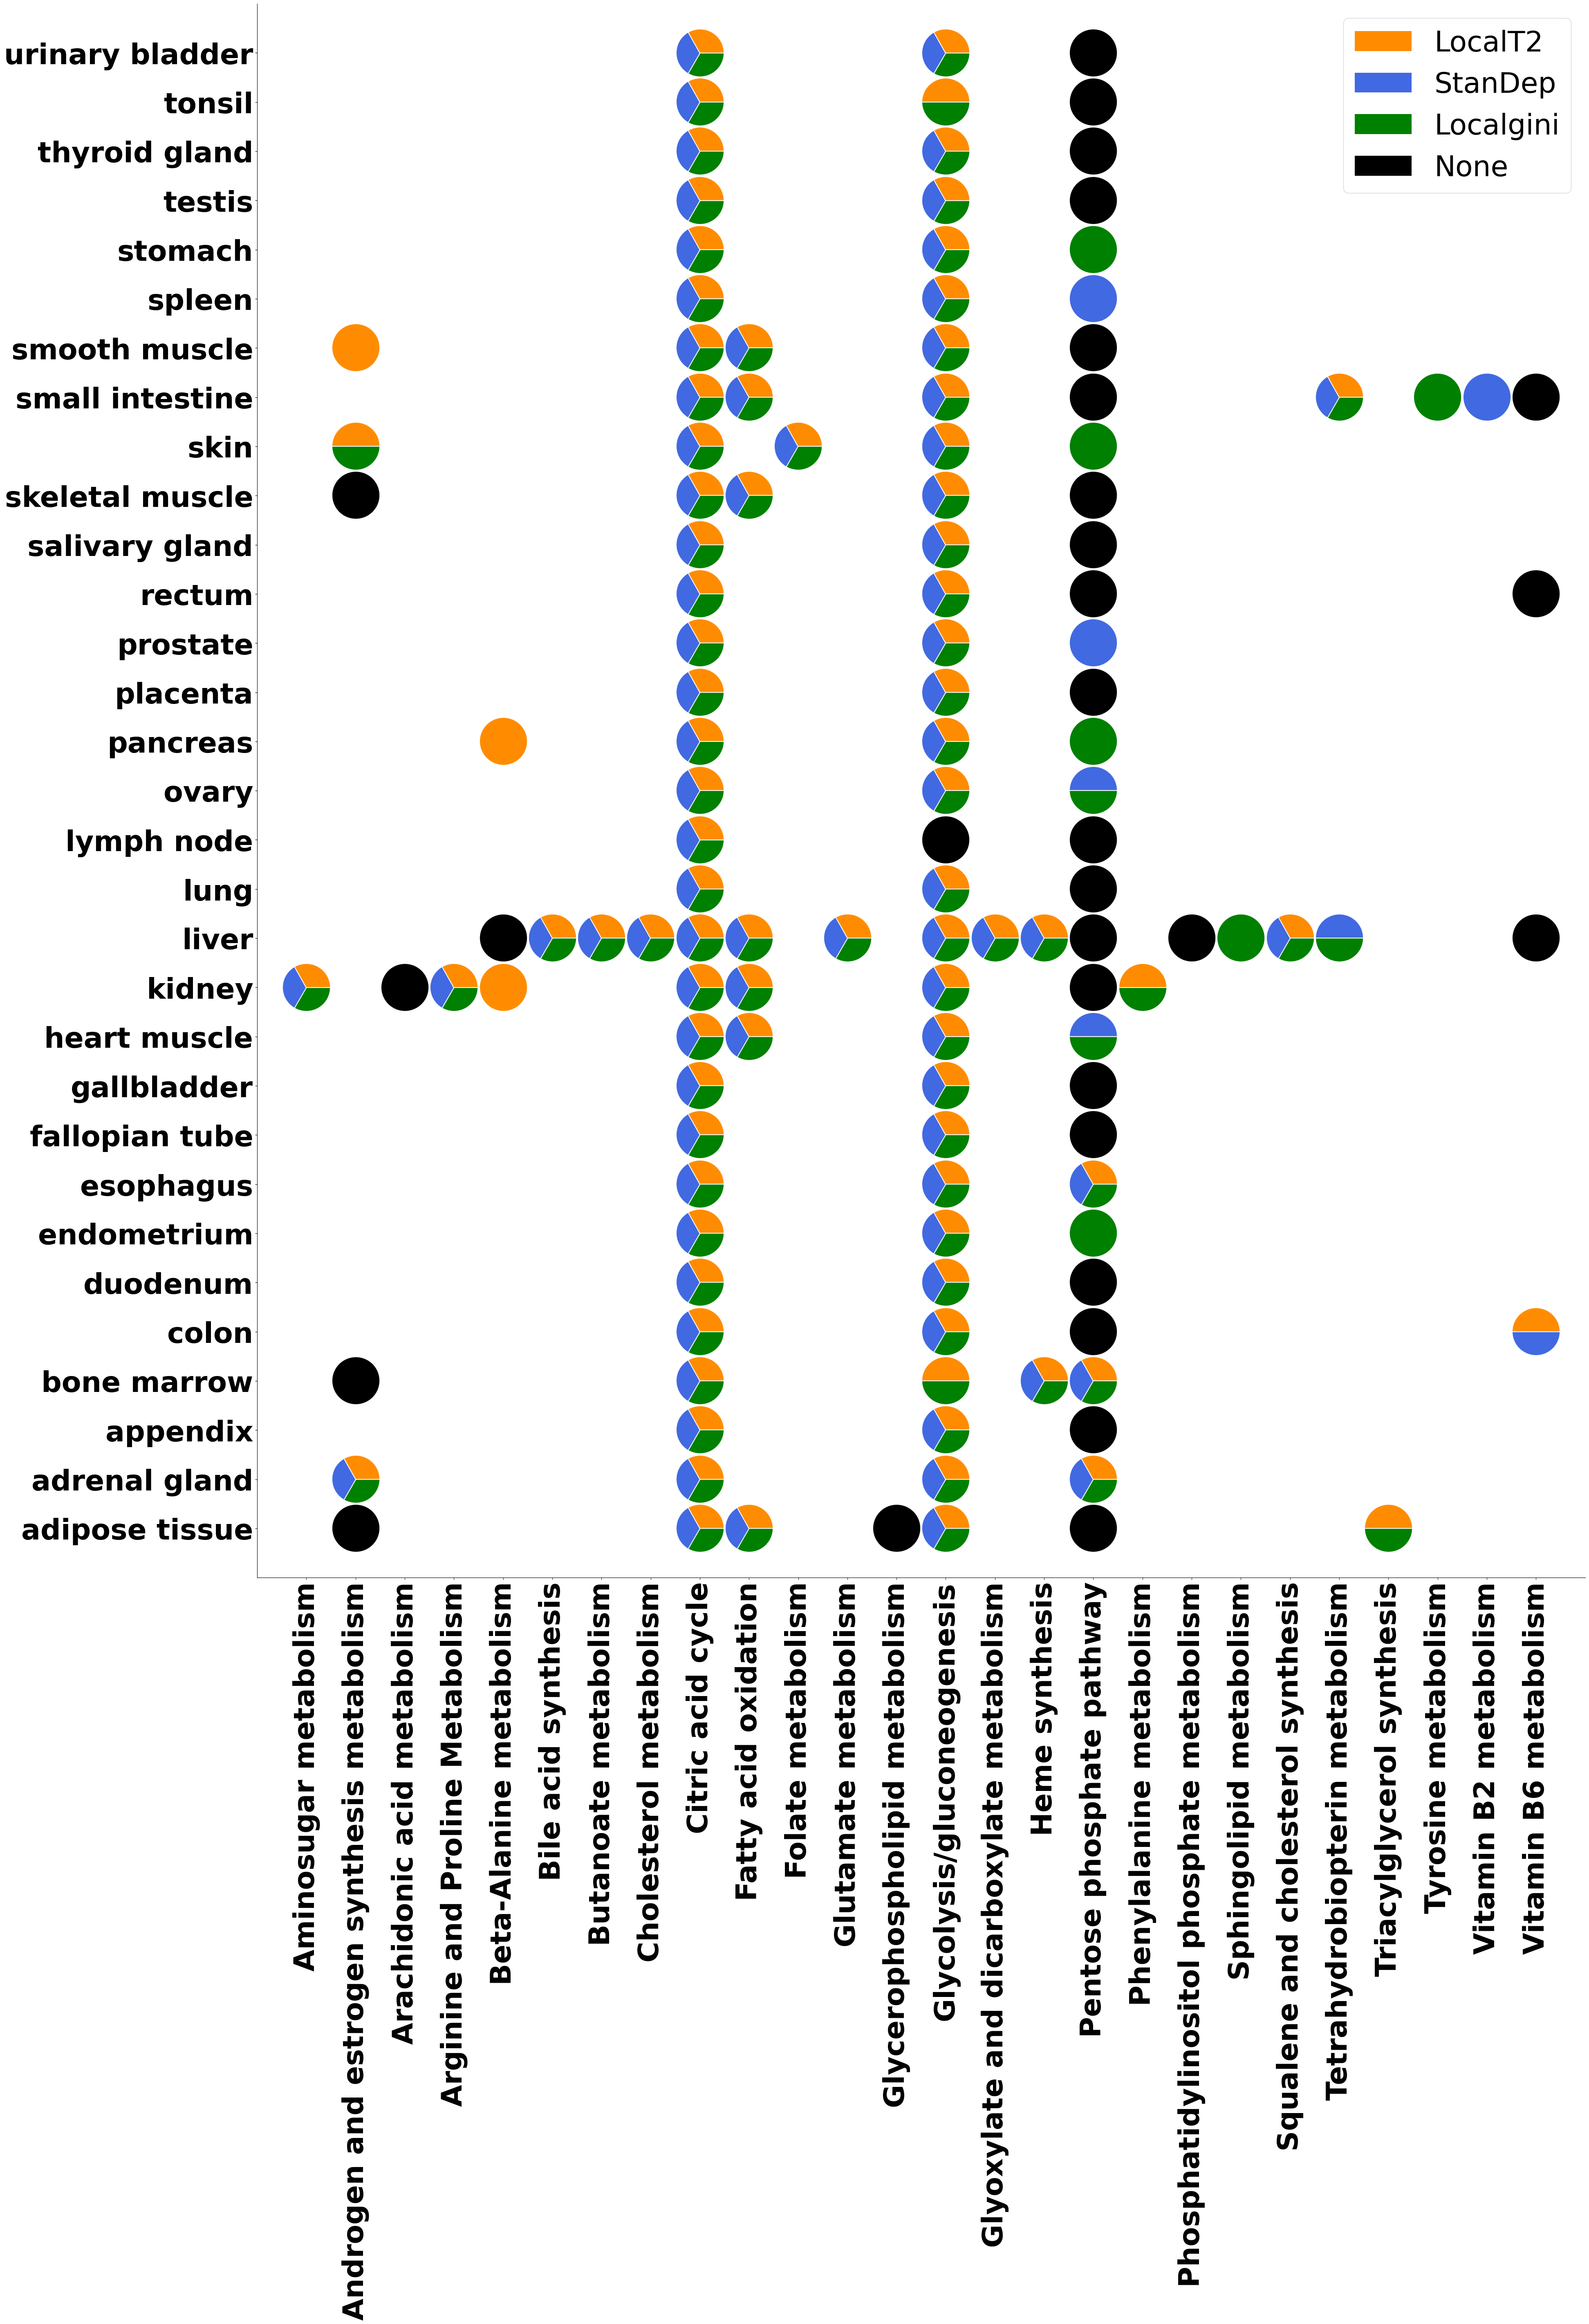

In [4]:
fig,ax=plt.subplots(figsize=(50,50))
plt.xlim(-1,len(paths))
plt.ylim(-1,31)
lt2_total,lg_total,sd_total=[],[],[]
for i,tiss in enumerate(dic.keys()):
  ys=np.squeeze(np.array(np.nonzero(np.isin(paths,dic[tiss]))))
  lt2_paths = lt2[i,ys]
  sd_paths = sd[i,ys]
  lg_paths = lg[i,ys]
  for j,p in enumerate(ys):
    lt2_p=lt2_paths[j]
    sd_p=sd_paths[j]
    lg_p=lg_paths[j]
    if np.sum([lt2_p,sd_p,lg_p])==3:
      im = plt.imread('enrichment_analysis//lt2_sd_lg.png')
      lt2_total.append(1)
      lg_total.append(1)
      sd_total.append(1)
      ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
    if np.sum([lt2_p,sd_p,lg_p])==0:
      im = plt.imread('enrichment_analysis/none.png')
      ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
    if np.sum([lt2_p,sd_p,lg_p])==1:
      if lt2_p==1:
        im = plt.imread('enrichment_analysis/lt2.png')
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
        lt2_total.append(1)
      if lg_p==1:
        im = plt.imread('enrichment_analysis/lg.png')
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
        lg_total.append(1)
      if sd_p==1:
        im = plt.imread('enrichment_analysis/sd.png')
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
        sd_total.append(1)
    if np.sum([lt2_p,sd_p,lg_p])==2:
      if lt2_p==0:
        im = plt.imread('enrichment_analysis/sd_lg.png')
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
        lg_total.append(1)
        sd_total.append(1)
      if lg_p==0:
        im = plt.imread('enrichment_analysis/lt2_sd.png')
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
        lt2_total.append(1)
        sd_total.append(1)
      if sd_p==0:
        im = plt.imread('enrichment_analysis/lt2_lg.png')
        lg_total.append(1)
        lt2_total.append(1)
        ax.imshow(im,extent=(p-0.5,p+0.5, i-0.5, i+0.5))
      # fig.figimage(im, p, i)
  # ax.scatter(ys,[i]*len(ys),color='black')
ax.set_yticks(np.arange(0,31))
ax.set_yticklabels(list(dic.keys()),fontweight='bold',fontsize=50)
ax.set_xticks(np.arange(0,len(paths)))
ax.set_xticklabels(list(paths),rotation=90,fontweight='bold',fontsize=50)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.add_patch(patchh.Rectangle((0,0),0,0,fc='darkorange',label='LocalT2'))
ax.add_patch(patchh.Rectangle((0,0),0,0,fc='royalblue',label='StanDep'))
ax.add_patch(patchh.Rectangle((0,0),0,0,fc='g',label='Localgini'))
ax.add_patch(patchh.Rectangle((0,0),0,0,fc='black',label='None'))
plt.legend(loc='upper right',fontsize='50')
plt.savefig('enrichment_analysis_r3d.pdf',bbox_inches='tight');

In [13]:
sum(lt2_total),sum(lg_total),sum(sd_total)

(91, 96, 89)

In [5]:
sum(lt2_total),sum(lg_total),sum(sd_total)

(91, 96, 89)

In [14]:
# fig,ax=plt.subplots(figsize=(5,5))
# plt.xlim(0,1)
# plt.ylim(0,1)
# p=patchh.Wedge((0.5,0.5),0.5,theta1=0,theta2=120,fc='darkorange',fill=True)
# ax.add_patch(p)
# p=patchh.Wedge((0.5,0.5),0.5,theta1=120,theta2=240,fc='royalblue',fill=True)
# ax.add_patch(p)
# p=patchh.Wedge((0.5,0.5),0.5,theta1=240,theta2=360,fc='g',fill=True)
# ax.add_patch(p)
# ax.set(xticks=[],yticks=[])
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.add_patch(patchh.rectangle((0,0),0,0,fc='darkorange'),label='LocalT2')
# plt.savefig('lt2_sd_lg.png',bbox_inches='tight')